In [ ]:
import os
X_train = []
y_train = []
train_folder=r'/media/ankanchanda/Data1/WORKPLACE/DSML/MiniProjects/CNN/Weed_plant_Detection/train/'
import cv2
for i in os.listdir(train_folder):
    print(i)
    if (os.path.isdir(train_folder + i)):
        for j in os.listdir(train_folder + i):
            try:
                dummy = cv2.imread(train_folder + i + '/' + j)
                dummy = cv2.resize(dummy,(128,128))
                X_train.append(dummy)
                y_train.append(i)
            except Exception as e:
                print(e)

Black-grass
Charlock


In [ ]:
#Converting the list to numpy array
import numpy as np
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

In [ ]:
X_train1.shape

In [ ]:
#Converting the named categorical labels to one-hot encoded format
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y_train2 = lenc.fit_transform(y_train1)
y_train1 = tf.keras.utils.to_categorical(y_train2)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_vl,y_tr,y_vl = train_test_split(X_train1,y_train1)

In [ ]:
#Here we're fetching the test images
X_test = []
import cv2
test_folder = r'/media/ankanchanda/Data1/WORKPLACE/DSML/MiniProjects/CNN/Weed_plant_Detection/test/'
for i in os.listdir(test_folder):
    dummy = cv2.imread(test_folder + i)
    dummy = cv2.resize(dummy, (128,128))
    X_test.append(dummy)

In [7]:
X_test1 = np.array(X_test)

In [8]:
X_test1.shape

(794, 128, 128, 3)

In [9]:
from tensorflow.keras import layers#Using layers module
from tensorflow.keras.models import Sequential#Using the sequential module to define a model sequentially/in a sequential manner
model = Sequential()

2022-04-07 09:26:16.681975: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-07 09:26:16.682010: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-04-07 09:26:16.683098: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(12,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 batch_normalization (BatchN  (None, 127008)           508032    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dropout (Dropout)           (None, 256)               0

In [ ]:
model.fit(X_train1,y_train1,epochs=104,batch_size=100)#Training the model

Epoch 1/104
48/48 [==============================] - 30s 602ms/step - loss: 13.0898 - accuracy: 0.3040
Epoch 2/104
48/48 [==============================] - 29s 599ms/step - loss: 1.8284 - accuracy: 0.4305
Epoch 3/104
48/48 [==============================] - 29s 605ms/step - loss: 1.1672 - accuracy: 0.6114
Epoch 4/104
48/48 [==============================] - 29s 610ms/step - loss: 0.7638 - accuracy: 0.7465
Epoch 5/104
48/48 [==============================] - 29s 600ms/step - loss: 0.5474 - accuracy: 0.8200
Epoch 6/104
48/48 [==============================] - 29s 605ms/step - loss: 0.4253 - accuracy: 0.8533
Epoch 7/104
48/48 [==============================] - 29s 603ms/step - loss: 0.3442 - accuracy: 0.8836
Epoch 8/104
48/48 [==============================] - 29s 594ms/step - loss: 0.2658 - accuracy: 0.9124
Epoch 9/104
48/48 [==============================] - 29s 594ms/step - loss: 0.2454 - accuracy: 0.9208
Epoch 10/104
48/48 [==============================] - 29s 603ms/step - loss: 0.23

In [114]:
model.fit(x_tr,y_tr,validation_data=(x_vl,y_vl),epochs=104,batch_size=100)#Training the model

Epoch 1/104
36/36 [==============================] - 25s 712ms/step - loss: 0.1003 - accuracy: 0.9789 - val_loss: 0.3333 - val_accuracy: 0.9461
Epoch 2/104
36/36 [==============================] - 28s 786ms/step - loss: 0.0910 - accuracy: 0.9784 - val_loss: 0.1167 - val_accuracy: 0.9790
Epoch 3/104
36/36 [==============================] - 28s 771ms/step - loss: 0.0704 - accuracy: 0.9848 - val_loss: 0.0943 - val_accuracy: 0.9773
Epoch 4/104
36/36 [==============================] - 27s 757ms/step - loss: 0.0963 - accuracy: 0.9789 - val_loss: 0.2109 - val_accuracy: 0.9655
Epoch 5/104
36/36 [==============================] - 29s 808ms/step - loss: 0.1041 - accuracy: 0.9759 - val_loss: 0.0239 - val_accuracy: 0.9907
Epoch 6/104
36/36 [==============================] - 28s 755ms/step - loss: 0.0713 - accuracy: 0.9843 - val_loss: 0.7105 - val_accuracy: 0.9369
Epoch 7/104
36/36 [==============================] - 26s 733ms/step - loss: 0.1080 - accuracy: 0.9775 - val_loss: 0.1302 - val_accuracy:

In [115]:
loss, acc = model.evaluate(X_train1,y_train1)#Evaluating the model
print(loss,acc)

149/149 [==============================] - 9s 59ms/step - loss: 0.3473 - accuracy: 0.9577
0.34732168912887573 0.9576842188835144


In [116]:
y_pred = model.predict(X_test1)#we predict the class using the trained model

In [117]:
out = []
for i in y_pred:
  out.append(np.argmax(i))#This helps to find the position at which the value is maximum
print(out)  

[2, 10, 6, 11, 3, 11, 3, 3, 5, 6, 6, 3, 10, 5, 8, 5, 0, 3, 3, 2, 3, 10, 9, 5, 11, 7, 3, 3, 3, 11, 3, 3, 6, 7, 6, 5, 6, 3, 7, 6, 6, 5, 10, 11, 7, 7, 3, 7, 10, 6, 11, 5, 7, 5, 1, 10, 2, 6, 5, 2, 1, 6, 7, 6, 0, 6, 9, 9, 10, 3, 6, 6, 3, 6, 3, 5, 7, 6, 6, 3, 2, 2, 6, 3, 5, 8, 3, 3, 6, 6, 3, 8, 6, 3, 3, 3, 5, 9, 11, 8, 5, 6, 1, 6, 3, 6, 3, 6, 6, 3, 7, 3, 6, 3, 3, 11, 6, 5, 3, 11, 2, 6, 1, 3, 9, 9, 6, 2, 1, 11, 3, 5, 11, 2, 6, 7, 1, 7, 5, 3, 11, 3, 3, 3, 6, 6, 0, 1, 6, 3, 6, 6, 3, 5, 11, 11, 10, 5, 1, 8, 6, 7, 5, 6, 10, 3, 6, 6, 1, 3, 3, 3, 3, 6, 5, 6, 3, 3, 3, 7, 7, 3, 3, 11, 6, 8, 6, 6, 10, 6, 8, 11, 3, 3, 5, 6, 10, 6, 1, 3, 6, 1, 0, 6, 6, 3, 5, 6, 1, 1, 10, 2, 6, 3, 5, 3, 6, 1, 6, 6, 10, 7, 6, 3, 3, 3, 6, 3, 10, 6, 0, 8, 3, 3, 7, 7, 2, 5, 3, 6, 6, 0, 6, 1, 3, 3, 7, 10, 7, 10, 6, 11, 10, 3, 3, 7, 3, 3, 6, 5, 1, 3, 3, 6, 7, 3, 7, 3, 11, 5, 3, 3, 1, 6, 6, 10, 3, 9, 5, 3, 3, 2, 6, 6, 7, 0, 7, 6, 3, 7, 3, 6, 2, 1, 7, 10, 11, 6, 6, 10, 0, 3, 3, 2, 10, 11, 1, 6, 4, 1, 3, 6, 3, 6, 9, 6, 11, 1, 6, 

In [118]:
out = lenc.inverse_transform(out)#To get the labels back in their original form

In [120]:
test_dir='/media/ankanchanda/Data1/WORKPLACE/DSML/MiniProjects/CNN/test/'
a=[]
for i in os.listdir(test_dir):
    print(i)
    a.append(i)

615d2b0a9.png
0021e90e4.png
003d61042.png
007b3da8b.png
0086a6340.png
00c47e980.png
00d090cde.png
00ef713a8.png
01291174f.png
026716f9b.png
02cfeb38d.png
03566743d.png
03a2ee656.png
03e322a29.png
03ef36742.png
043449b0b.png
0437393b1.png
04814f36d.png
060450d79.png
060f1dc84.png
0625f063b.png
063363305.png
06d12f6fa.png
071cb3ece.png
0751c0bbc.png
07e62f903.png
085974290.png
0885e7690.png
089ad62a7.png
08d591441.png
0911d3dee.png
099b961ec.png
0a64e3e6c.png
0ad9e7dfb.png
0ae6668fa.png
0c27cf05f.png
0c4199daa.png
0c45ace27.png
0c51bf229.png
0c5f6c493.png
0caeda5df.png
0d117d910.png
0d31e6602.png
0dba99002.png
0e8492cb1.png
0ebf8f2f4.png
0ee4ad224.png
0f6cbe5e8.png
0fb233ad6.png
115f93ecc.png
116b136de.png
1191ba346.png
122913909.png
12625488b.png
126a71ce0.png
1312065a5.png
1364b297a.png
1376f3b63.png
13b9fa92d.png
1459e96a0.png
148bbda66.png
14bb43eee.png
1541bdb2e.png
1623fb9e1.png
16357b436.png
16467a950.png
165681fd9.png
1694a70e4.png
16fd2e01a.png
05341a8a6.png
0bf7bfb05.png
11d3f6

In [121]:
import pandas as pd
#Creating a dataframe & exporting in the csv file format with images & labels columns
results = {'Labels':out,'Images':a}
results = pd.DataFrame(results)

In [122]:
#Checking the datframe
results.head()

,Labels,Images
0,Cleavers,615d2b0a9.png
1,Small-flowered Cranesbill,0021e90e4.png
2,Loose Silky-bent,003d61042.png
3,Sugar beet,007b3da8b.png
4,Common Chickweed,0086a6340.png


In [123]:
#Exporting the dataset to csv
results.to_csv('results.csv')

## Displaying images with respective labels

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df= pd.read_csv('results.csv')

In [49]:
df= df.drop('Unnamed: 0', axis=1)
df

KeyError: "['Unnamed: 0'] not found in axis"

,Labels,Images
0,Cleavers,615d2b0a9.png
1,Small-flowered Cranesbill,0021e90e4.png
2,Loose Silky-bent,003d61042.png
3,Sugar beet,007b3da8b.png
4,Common Chickweed,0086a6340.png
...,...,...
789,Loose Silky-bent,fea355851.png
790,Loose Silky-bent,fea3da57c.png
791,Fat Hen,fef2ade8c.png
792,Charlock,ff65bc002.png


In [44]:
def displayImagesWithCaptions(label, image):
    path=test_folder+image
    img = plt.imread(path)
    plt.title(label)
    plt.imshow(img)

In [45]:
row_1=df.iloc[0]

In [46]:
row_1

Labels         Cleavers
Images    615d2b0a9.png
Name: 0, dtype: object

In [47]:
type(row_1[1])

str

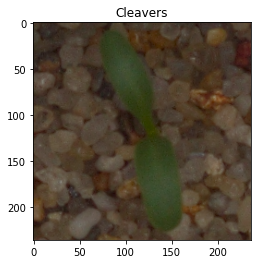

In [48]:
displayImagesWithCaptions(row_1[0], row_1[1])